In [1]:
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
X = np.linspace(0, 10, 10)
Y = X + np.random.randn(*X.shape)

### seed
- 무작위와 관련된 모든 알고리즘은 사실 무작위가 아니라 시자가 숫자를 정해 주면 그 다음에는 정해진 알고리즘에 의해 마치 난수 처럼 보이는 수열을 생성한다.  
- 같은 알고리즘을 여러번 실행하다라도 다른 숫자가 나오도록 시작 숫자를 현재 시간등을 이용해서 매번 바꿔줄 수있고 이를 시드(seed)라고 한다.

### numpy 난수 메소드
np.random.seed : seed를 통한 난수 생서  
np.random.rand : 0부터 1사이의 균일 분포에서 난수 생성  
np.random.randn : 가우시안 표준 정규 분포에서 난수 생성  
np.random.randint : 균일 분포의 정수 난수 생성  
np.random.shuffle : 긴존의 데이터의 순서 바꾸기  
np.random.choice : 기존의 데이터에서 sampling  
np.unique : 데이터에서 중복된 값을 제거하고 중복되지 않는 값의 리스트 출력  
np.bincount : 발생하지 않는 사건에 대해서도 카운트를 해준다.  

### TF 2.x 환경에서 TF 1.x 소스 실행 할때 TF 임포트 방법
```python
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
```

In [3]:
# 데이터 조회
for x, y in zip(X, Y):
    print((round(x, 1), round(y,1)))

(0.0, -0.0)
(1.1, 0.7)
(2.2, 1.0)
(3.3, 3.5)
(4.4, 3.7)
(5.6, 5.8)
(6.7, 6.8)
(7.8, 7.3)
(8.9, 9.0)
(10.0, 8.6)


In [5]:
# 선형 회귀 모델 만들기 keras의 Seauentail을 이용
model = Sequential()
model.add(Dense(input_dim=1, units=1, activation="linear", use_bias=False))


In [6]:
#경사하강법으로 선형회구 함수, learning rate 0.01, 비용함수는 MSE 사용
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer='sgd', loss='mse')

In [7]:
# 선형회귀 모델을 학습하기전에 최초로 설정된 w를 조회
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print('initial w is : ' + str(w))

initial w is : 1.0488144


In [9]:
# 선형 회귀 모델 학습
model.fit(X, Y, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 14ms/step - loss: 0.7243
Epoch 2/10
10/10 [==============================] - 0s 100us/step - loss: 0.3616
Epoch 3/10
10/10 [==============================] - 0s 101us/step - loss: 0.3298
Epoch 4/10
10/10 [==============================] - 0s 100us/step - loss: 0.3270
Epoch 5/10
10/10 [==============================] - 0s 100us/step - loss: 0.3268
Epoch 6/10
10/10 [==============================] - 0s 100us/step - loss: 0.3267
Epoch 7/10
10/10 [==============================] - 0s 100us/step - loss: 0.3267
Epoch 8/10
10/10 [==============================] - 0s 0us/step - loss: 0.3267
Epoch 9/10
10/10 [==============================] - 0s 0us/step - loss: 0.3267
Epoch 10/10
10/10 [==============================] - 0s 100us/step - loss: 0.3267


In [10]:
weights = model.layers[0].get_weights()
w = weights[0][0][0]
print('initial w is : ' + str(w))

initial w is : 0.9425178


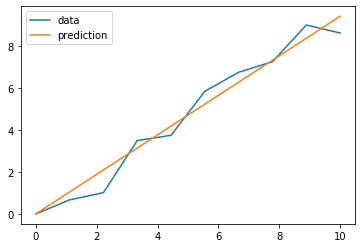

In [11]:
plt.plot(X, Y, label='data')
plt.plot(X, w*X, label = 'prediction')
plt.legend()
plt.show()